In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.datasets import get_data_home


In [2]:
mnist = fetch_mldata('MNIST original')
X = mnist.data / 255.0 
y = mnist.target

C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
print(get_data_home())

C:\Users\SPundir\scikit_learn_data


In [5]:
import pandas as pd
feat_cols=['pixel'+str(i) for i in range(X.shape[1])]
df=pd.DataFrame(X,columns=feat_cols)
df['labels']=y
df['labels']=df['labels'].apply(lambda i:str(i))

In [6]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

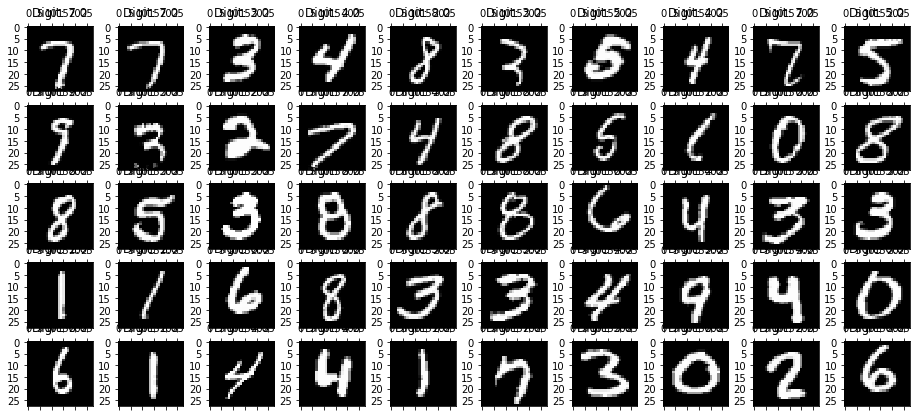

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,50):
    ax = fig.add_subplot(5,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'labels']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca1']=pca_result[:,0]
df['pca2']=pca_result[:,1]

In [9]:
sum(pca.explained_variance_ratio_)

0.333434096139005

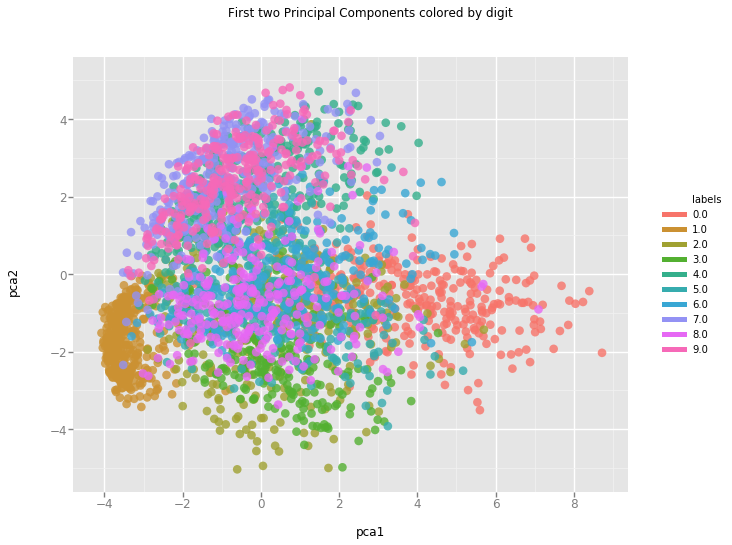

<ggplot: (172068004528)>

In [9]:
from ggplot import *
chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca1', y='pca2', color='labels') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First two Principal Components colored by digit")
chart

In [10]:
from sklearn.manifold import TSNE

n_sne = 5000

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.643s...
[t-SNE] Computed neighbors for 5000 samples in 73.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.301026
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.049850
[t-SNE] KL divergence after 300 iterations: 1.867919


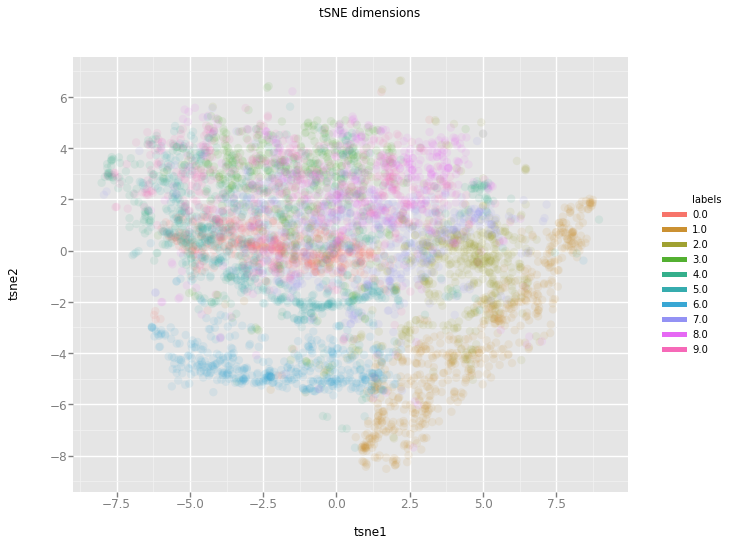

<ggplot: (-9223371864786249633)>

In [11]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['tsne1'] = tsne_results[:,0]
df_tsne['tsne2'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='tsne1', y='tsne2', color='labels') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions")
chart